# Homework 04 - Numpy

### Exercise 1 - Terminology

Describe the following terms with your own words:

***numpy array:*** Is a (usually regular/rectangular?) numpy data structure where each element in the array can be identified by its index. Each element in the array is of the same data type. Arrays can be of any dimension, where a 1D array is equivalent to a vector and a 2D array is equivalent to a matrix. Operations with numpy arrays are highly efficient when the indexing in the array is regular.  

***broadcasting:*** Is a convention of rules how arrays with different dimensions are treated when they are combined in arithmetic operations. The basic rule is that the dimensions of two arrays are compatible when the are either equal or one of them is one, e.g.:

```Python
import numpy as np
# Vector with a scalar:
x1 = np.array([1.0, 2.0, 3.0])
y1 = 2.
x1 * y1

# 2D array dim (3,3) with a 1D array (3,)
y2 = np.eye(3)
y2 * x1
```

Answer the following questions:

***What is the difference between a Python list and a Numpy array?***

The elements in an array must be of the same data type or are converted to the 'most flexible' one (in the order bool > int > float > str). Each list element can be of any data type or structure. As a consequence arithmetic operations have different effects for these data structures (e.g. addition, multiplication).

***How can you avoid using loops or list comprehensions when working with Numpy?***

Numpy arrays by default perform elementwise operations, where lists require to iterate over each element.

***Give different examples of usages of square brackets `[]` in Python and Numpy? Describe at least two completely different ones!***

To define a list:   `l = [[1,2], "a"]`

To define an array: `a = np.array([1.,2,3]) # would convert all elements to float`

***Give different examples of usages of round brackets `()` in Python and Numpy? Describe at least two completely different ones! (Bonus: give a third example not covered in the lecture until now!)***

To pass arguments to a function: `fun(arg1, arg2)`

To define a tuple: `t = ("a", "b", "c")`

### Exercise 2 - rotate and plot points in 2D

Plot the 5 points in 2D defined in the array `points`, then rotate the points by 90 degrees by performing a matrix multiplication with a [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix) by using `rotation_matrix @ points` and plot the result in the same plot. The rotation angle needs to be converted to radians before it is passed to `np.cos()` and `np.sin()`, use `np.radians(90)` to do so.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[0, 0],
                   [1, 1],
                   [-1, -1],
                   [0, 1],
                   [0, 0.7],
                  ]).T

angle = np.radians(90)
rotation_matrix = ([np.cos(angle), -np.sin(angle)],
                   [np.sin(angle), np.cos(angle)]) 
points_rotated = rotation_matrix@points

The result should like like this:

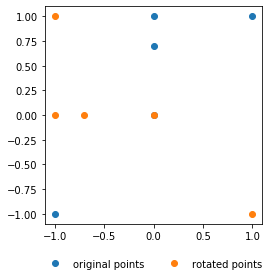

In [2]:
plt.plot(*points, 'o', label='original points')
plt.plot(*points_rotated, 'o', label='rotated points')
plt.gca().set_aspect('equal')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), frameon = False, ncol = 2)

### Exercise 3 - Flatten the curve

Copy the function `new_infections(t, k)` from last week's homework (exercise 3) and re-do the exercise using Numpy arrays instead of Python lists.

What needs to be changed in the function `new_infections(t, k)` to make this work?

In [3]:
import math

def new_infections(t, k, P, i_0):
    i_new = (np.exp(-k*P*t) * k * P**2 * (-1 + P/i_0)) / (1 + np.exp(-k*P*t) * (-1 + P/i_0))**2
    return(i_new)

<function matplotlib.pyplot.show(*args, **kw)>

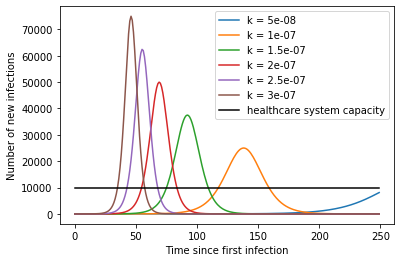

In [4]:
P = 1000000
i_0 = 1
c = np.arange(0.5,3.5,0.5)
k = c/(P*10)
t = np.arange(250)
capacity = 10000
k_i = k[1]

for k_i in k:
    new_infections_i = new_infections(t,k_i,P, i_0)
    plt.plot(t,new_infections_i, label = f'k = {k_i}')
plt.plot(t,len(t)*[capacity], 'black', label = "healthcare system capacity")
plt.xlabel("Time since first infection")
plt.ylabel("Number of new infections")
plt.legend()
plt.show

### Exercise 4 - Mean of random numbers

Generate 100 random values between 0 and 1 (uniformly distributed) and plot them. Then calculate the mean value of the first i values for $i=1,\ldots,100$ and plot this list too.

To solve the exercise find out how to generate random values with Numpy! How did you find an answer? Which possible ways are there? List at least ***2 to 5 different ways*** to look up what a numpy function does!

Note: To solve this exercise, a list comprehension is necessary. Pure Numpy is faster, but probably not a good idea here.

In [5]:
# The python way
import random as rd
random_unif1 = [rd.random() for i in range(100)]
random_unif2 = [rd.uniform(0,1.) for i in range(100)]

# The numpy way 
random_unif3 = np.random.uniform(0,1,100)

# All methods found by online search, as usual looking for the first stackoverflow entry. 
# The Numpy documentation is also not bad

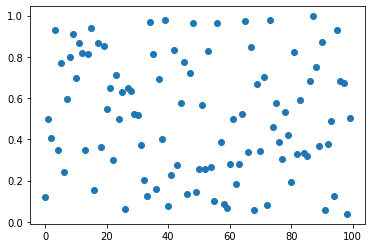

In [6]:
plt.plot(random_unif3, 'o')

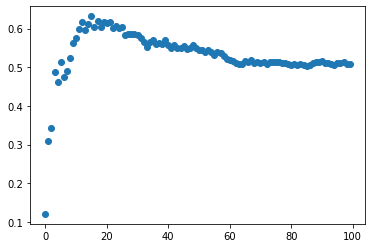

In [7]:
mean_1_100 = [np.mean(random_unif3[0:i+1]) for i in range(100)]
plt.plot(mean_1_100, 'o')  